<a href="https://colab.research.google.com/github/Teoroo-CMC/DoE_Course_Material/blob/main/Week_2/Workshop_extra/Jupyter-notebooks/stats-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics: Testing and Regression
(adapted from CHEM 1000 - Spring 2023 Prof. Geoffrey Hutchison, University of Pittsburgh)

By the end of this session, you should be able to:
- Understand hypothesis testing and p-values
    - Know about t-tests and f-tests (ANOVA)
- Know a little bit about statistical design of experiments
- Understand some key concepts about linear and nonlinear regression / curve-fitting

## Hypothesis Testing

As a reminder, we've talked about statistics from distributions, e.g., what is the mean or median of some data.

We also briefly talked about setting up tests, e.g., for COVID or drug testing, etc.
- you might have false positives (e.g., the test shows positive, but it's wrong)
- you might have false negatives (e.g., the test shows negative, but it's wrong)

Let's go into a bit more detail.

Imagine we're doing a blood test, and the standard concentration range is 3-5 ppm.

<img src="./images/normal-testing.png" width="350" />

Now, imagine we have two samples.
- one sample has a concentration of 4.7 ppm.
- one sample has a concentration of 7.8 ppm.

The "null hypothesis" is that a sample concentration happened entirely by chance / normal variation.

Clearly the first sample seems likely to have occurred by normal variation. It's a bit high, but there's lots of data in that part of the curve.

On the other hand, the second sample seems to be *very* high.

## P-Values and T-Tests

What we want to decide is whether our new measurements happen by chance:
- default (null) hypothesis - the new data comes from the original normal distribution
- the alternative hypothesis - this new data is different

In short, we want to know the probability of the new data coming from the original distribution.

This is known as the "p-value"

P values are the probability that a sample will have an effect at least as extreme, if the null hypothesis is correct. They're sometimes called significance levels (e.g., "the effect is statistically significant.")

<img src="./images/normal-t-test2.png" width="350" />
<img src="./images/normal-t-test3.png" width="350" />

To compare distributions with different means, we can calculate the t-test value:

$$
t = \frac{\bar{x}_{1}-\bar{x}_{2}-\Delta}{\sqrt{\frac{s_{1}^{2}}{n_{1}}+\frac{s_{2}^{2}}{n_{2}}}}
$$

where $\Delta$ is the hypothesized difference between the two samples (i.e., usually zero)

In [1]:
import numpy as np

t = (5.0 - 4.0 - 0.0) / np.sqrt(0.5/500 + 0.5/500)
print(t)

22.360679774997898


Okay, so that's the $2\sigma$ difference... How do I interpret the t-test value?

You want to look up the value in a t-test table - you'll need to know the number of degrees of freedom. That's the number of items minus one (since the mean is known).

For example:
https://www.itl.nist.gov/div898/handbook/eda/section3/eda3672.htm

$$
\begin{array}{ccccrrr}
\boldsymbol{v} & 0.90 & 0.95 & 0.975 & 0.99 & 0.995 & 0.999 \\
\hline
1 . & 3.078 & 6.314 & 12.706 & 31.821 & 63.657 & 318.313 \\
2 . & 1.886 & 2.920 & 4.303 & 6.965 & 9.925 & 22.327 \\
3 . & 1.638 & 2.353 & 3.182 & 4.541 & 5.841 & 10.215 \\
4 . & 1.533 & 2.132 & 2.776 & 3.747 & 4.604 & 7.173 \\
5 . & 1.476 & 2.015 & 2.571 & 3.365 & 4.032 & 5.893 \\
6 . & 1.440 & 1.943 & 2.447 & 3.143 & 3.707 & 5.208 \\
7 . & 1.415 & 1.895 & 2.365 & 2.998 & 3.499 & 4.782 \\
8 . & 1.397 & 1.860 & 2.306 & 2.896 & 3.355 & 4.499 \\
9 . & 1.383 & 1.833 & 2.262 & 2.821 & 3.250 & 4.296 \\
10 . & 1.372 & 1.812 & 2.228 & 2.764 & 3.169 & 4.143
\end{array}
$$

A useful exercise is to play with some of the numbers above .. I've picked 500 items, so my t-test has great sensitivity. It's much worse if you have fewer items.

In [2]:
t = (5.0 - 4.0 - 0.0) / np.sqrt(0.5/5 + 0.5/5)
print(t)

2.23606797749979


Notice that for 5 items, we have 4 degrees of freedom, so the $2\sigma$ difference shows up between a p-value of 0.05 and 0.025.

In other words, that difference has less than a 5% chance of occurring randomly - somewhere around 3-3.5%.

Most people would call that statistically significant.

## Comparing Multiple Groups: ANOVA

If we have to compare multiple different categories, need a different method - we don't want to run repeated t-tests.

The method is called [ANOVA](https://en.wikipedia.org/wiki/Analysis_of_variance) - **AN**alysis **O**f **Va**riance. Not surprisingly, the idea is to compare the *mean* of a group and the *variance*

Most often, people do a one-way ANOVA - one category with several different entries. It's possible in most software to set up a two-way (or N-way) ANOVA if you have more than one category. (Consider a study where you're testing pH, temperature, and two different catalysts.)

## Hypothesis

The default (null) hypothesis is that all the groups are the same - they have the same mean.

That means we're trying to show at least one group has a different mean.

We often use a [box plot](https://en.wikipedia.org/wiki/Box_plot) to show these trends:

<img src="./images/anova1.png" width="350" />

<img src="./images/anova2.png" width="350" />

Notice in the second, the effect is more pronounced.

Much like the t-test, we generate a "p-value" for whether any group is different from the rest by chance.

(For example, it might be statistically significant difference with 0.05 chance, 0.01 chance, etc.)

## Statistical Design of Experiments

It's a whole topic or course, but we can use t-tests and ANOVA to consider how to set up experiments. For example, we can compare 3-4 different things at once (e.g., three different pH or four different temperatures).

We can also use the statistical significance and expectations of the size of the effect to estimate the number of data points (e.g., how many people do we want in our COVID vaccine trial to be sure there's a difference in infection rate.. and that it's similar across men, women, different ethnic groups, etc.)

Of course a statistically significant effect may or may not be *practically* important.

I can take lots of data points and show that my software calculates integrals 1% faster. Is that practically important?

## Linear (and Nonlinear) Regression

Probably all of you have fit a trendline through a set of data in Excel or another program:

$$
y = mx + b; R^2 = ...
$$

There are assumptions behind linear regression:

- **Linearity**: the relationship between X and Y is linear.
- **Independence**: observations are independent of each other (e.g., it's not a time series)
- **Homoscedasticity**: the residual errors do not depend on X
- **Normality**: the residual errors are normally distributed

It's fairly easy to use some diagnostic plots to test these assumptions, particularly:
- looking at the observed Y values versus the fitted values
- looking at the residual errors as a function of X values

We'll talk about the assumptions and what to do if they don't hold up later.

There are several packages in Python that can (and will) do curve fitting - each has somewhat different features:
- statsmodels
- scipy
- scikit-learn

We're going to use `scipy.stats.linregress()` for linear regression and `scipy.optimize()` for general curve fitting.

In [8]:
# Let's plot it!
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
#plt.style.use('./chem1000.mplstyle')

In [4]:
# Create toy data 
x = np.arange(0, 10, 0.2) # remember this will create an array from 0 to 10 with 0.25 intervals
y = x + (np.random.rand(len(x)) * 6) # just add some random scatter to the x-values

In [6]:
import scipy.optimize
import scipy.stats

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
print(slope, intercept, r_value**2)

0.976920719895896 3.345182888434599 0.7359255313987546


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found

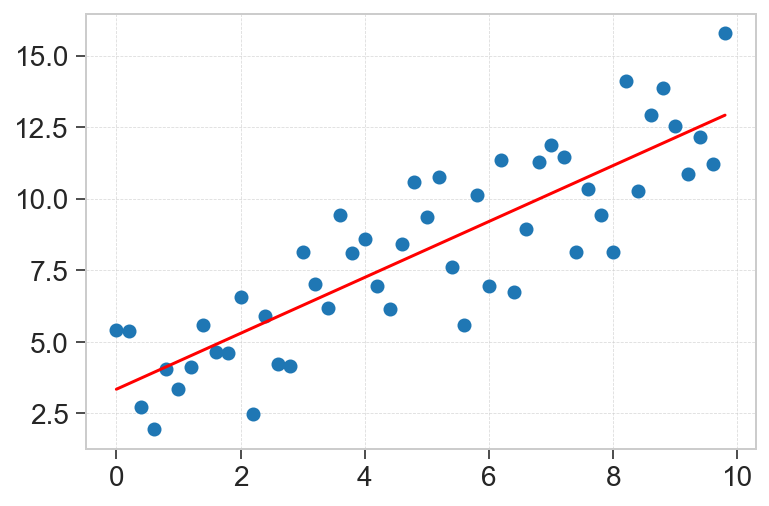

In [7]:
plt.scatter(x, y)
plt.plot(x, slope*x + intercept, color='red')
plt.show()

Okay, so by definition, that's the best line that fits the data. How confident are we in the result? Well, we know the slope should be 1.0, but the intercept will be random, so we don't know that for sure.

There are formulas for confidence intervals, but before we get to that, we can actually see how those formulas work.

We're going to **bootstrap**. It's a really simple numerical method that works for a lot of statistics problem.
- randomly take a subset of the data (say 50%, 75%, etc.)
- perform our analysis (e.g., perform a regression, take the mean/average, etc.)
- repeat a lot
- look at the average and variance of the resulting repeated samples

An example might be useful: consider if I want to know if a coin flip is fair. If I flip it (i.e., sample randomly) 1000 times, I should have pretty reliable data due to the law of large numbers.

In this case, let's sample from our data, perform a linear regression and repeat a lot:

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found

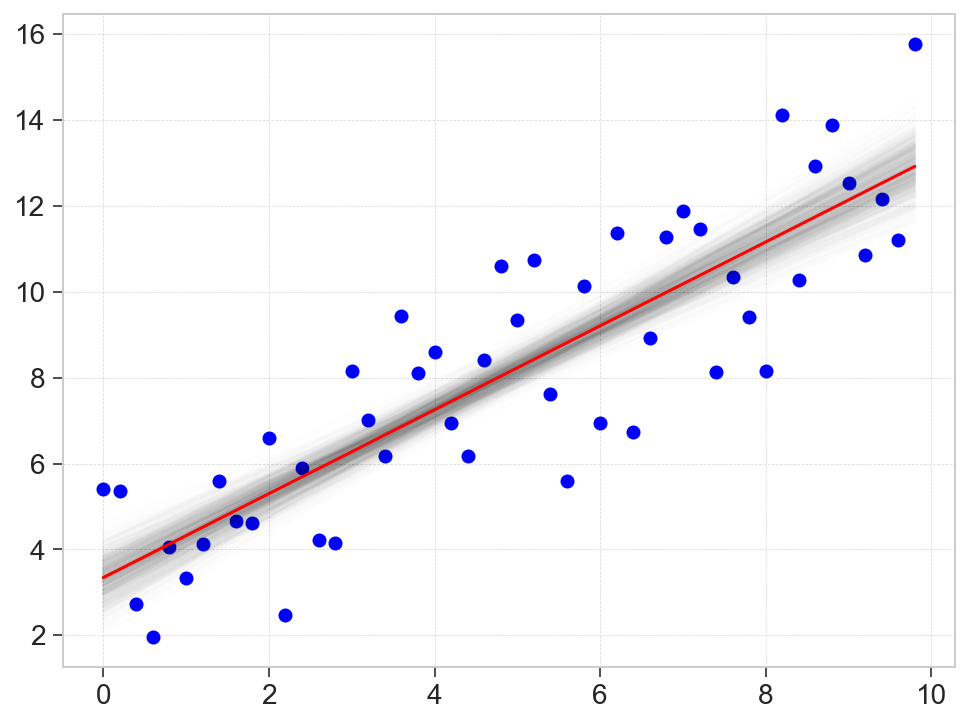

In [9]:
# adapted from https://stats.stackexchange.com/a/218988/42723

# create a plot for all our bootstrap regresssions
plt.figure(figsize=(8,6))

# how many times to do the bootstrap sampling
n_boot = 1000
a = 3.0 / n_boot # show some transparency - if you change the figsize, you'll want to tweak this
for i in range(0, n_boot):
    # randomly pick from the data
    sample_index = np.random.choice(range(0, len(y)), len(y))

    x_samples = x[sample_index]
    y_samples = y[sample_index]    

    # perform the linear regresssion on our random samples
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x_samples, y_samples)
    # we'll plot after applying the function to the whole range
    plt.plot(x, slope*x + intercept, color='grey', alpha=a)

# scatter plot for the original data
plt.scatter(x,y, marker='o', color='blue')
# plot our best-fit line
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
plt.plot(x, slope*x + intercept, color='red')

Notice that there's a range of intercepts and slopes. These roughly outline **confidence intervals** on our linear regression.
- The center region will have tighter confidence intervals
- Edges will have broader ranges due to possible variation in the intercept and slope

Diagnostics?

Let's be careful and check if our regression satisfies the four assumptions:
- Linearity - looks okay, but we'll check that
- Independence - well, we constructed it to be independent, but we'll check that too
- Homoscedasticity - we'll need to look at the residuals
- Normality - ditto

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found

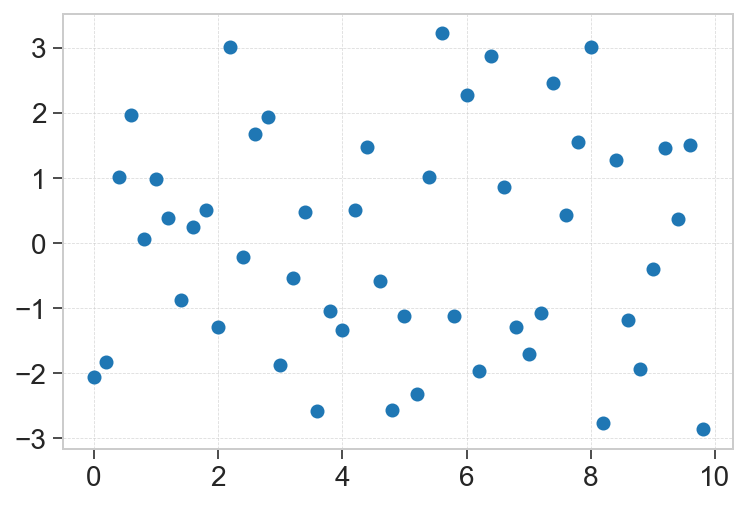

In [10]:
fitted = slope*x + intercept
residuals = fitted - y # my original "observations"

plt.scatter(x, residuals)

Okay, looks fairly random...
- it's *not* heteroscedastic (we'll see an example in a bit)
- *probably* normal?

(array([5., 6., 8., 3., 3., 7., 5., 7., 2., 4.]),
 array([-2.85187274, -2.24514473, -1.63841672, -1.0316887 , -0.42496069,
         0.18176732,  0.78849534,  1.39522335,  2.00195137,  2.60867938,
         3.21540739]),
 <BarContainer object of 10 artists>)

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found

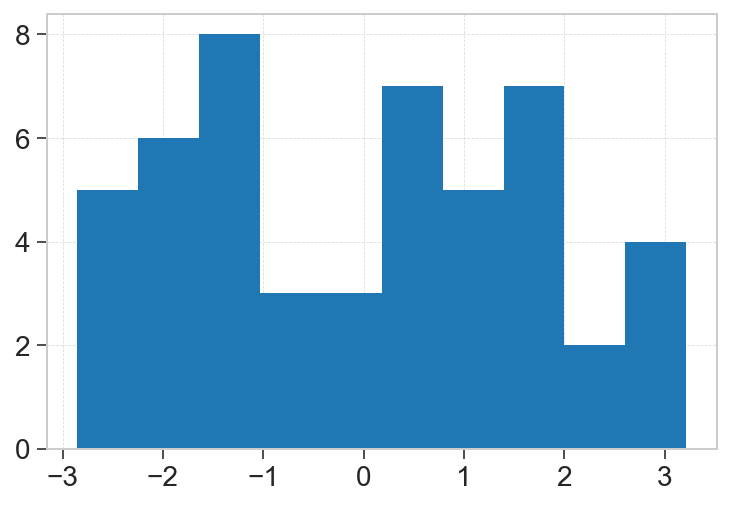

In [11]:
plt.hist(residuals)

Assumption checklist:
- Linearity - looks good - if it's nonlinear the residuals show patterns (hang on)
- Independence - same thing - not usually a problem with a one-variable fit
- Homoscedasticity - looks good from plotting the residuals
- Normality - the histogram looks.. eh? not great, not bad.. maybe?

In principal, you should do this for all regressions.

You *definitely* need to do this if it's a borderline case...

## Types of Regression

Sometimes your data doesn't follow a linear function. Even if it looks mostly linear.

From [XKCD](https://xkcd.com/2048/):
<img src="https://imgs.xkcd.com/comics/curve_fitting_2x.png" width="413" />

A recent research project in the group is testing several methods of calculating the molecular polarizability $\alpha$. Polarizability is connected to the induced dipole moment, dielectric constants, index of refraction... etc.

We're comparing two methods:
- GFN2 is an approximate method.. but it's really fast (e.g., a few seconds per compound)
- $\omega$B97X is a density functional method.. much more accurate, but minutes to hours per compound

Here's a subset of the smaller molecules in the test set:

<img src="./images/polarizabilities.png" width="350" />

So that's a slope of 1.00, an intercept of 0.00, and a really nice $R^2$ value.

In [13]:
# if we had a bigger spreadsheet, I might use the 'pandas' module
alpha_gfn2 = np.loadtxt('./data/polarizabilities.csv', skiprows=1, usecols=[0], delimiter=',')
alpha_wb97 = np.loadtxt('./data/polarizabilities.csv', skiprows=1, usecols=[1], delimiter=',')

In [14]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(alpha_gfn2, alpha_wb97)
print(slope, intercept, r_value**2)

1.499769125601464 -10.786848752980966 0.9145708678469943


Hmm, that's not the same... Slope is now ~1.5, and there's an intercept of -10.8?

What happened?

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found

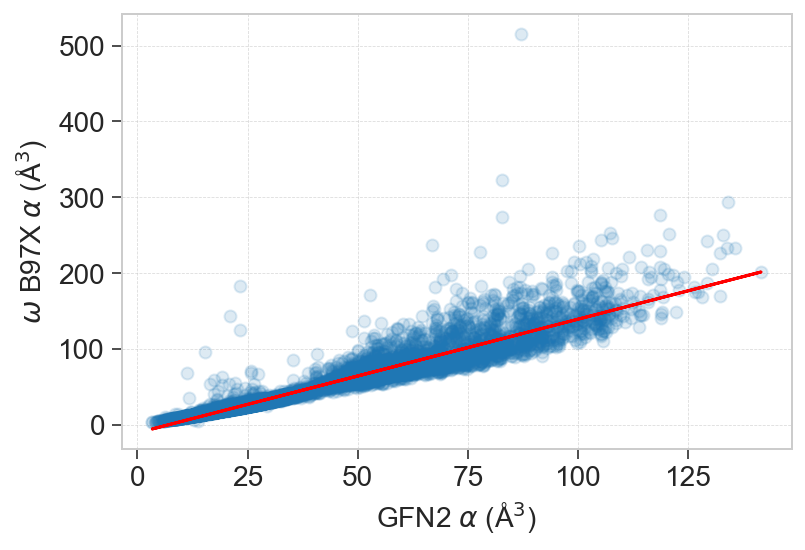

In [15]:
# let's plot it

# plot our best-fit line
plt.plot(alpha_gfn2, slope*alpha_gfn2 + intercept, color='red')

# raw data
plt.scatter(alpha_gfn2, alpha_wb97, alpha=0.15)
# axis labels - might look a bit confusing to get the Greek letters
plt.ylabel(r'$\omega$ B97X $\alpha$ (Å$^3$)')
plt.xlabel(r'GFN2 $\alpha$ (Å$^3$)')
plt.show()

Even ignoring the obvious outliers, this doesn't look so good.
- The intercept should go through the origin
- The errors are small for small values, but much bigger as you go to the right
     - Uh oh, that's *heteroscedasticity*!
- If the fit is 1.00 for small values, why is it 1.5 now?
    - Is this data truly linear?
    
Let's plot the diagnostic plots:

In [16]:
fitted = slope * alpha_gfn2 + intercept
residuals = alpha_wb97 - fitted

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found

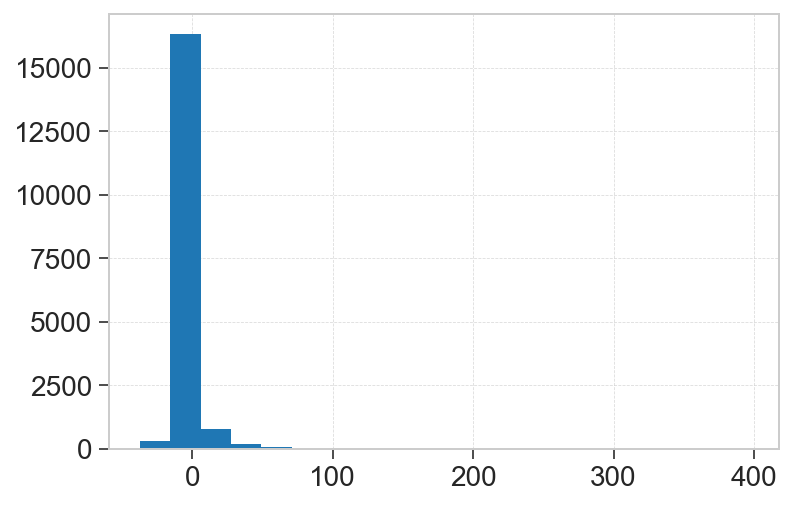

In [17]:
plt.hist(residuals, bins=20)
plt.show()

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found

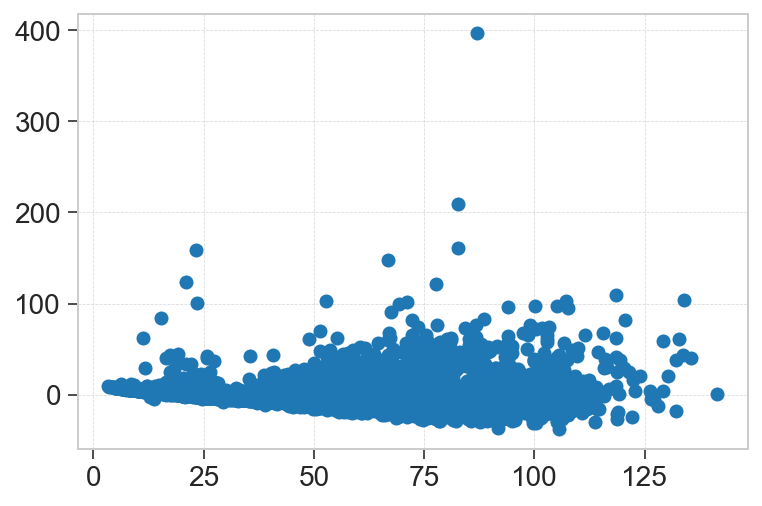

In [18]:
plt.scatter(alpha_gfn2, residuals)

Uh oh. That doesn't look good
- the residuals probably aren't normal .. although it's skewed by the huge outlier
- the heteroscedasticity shows clearly - errors get big towards the right
- there seems to be a slope to negative values

## Transforms and Nonlinear Curve Fitting

There are a few solutions when the data isn't linear. If you've used Excel, you've probably changed the fit function, for example:
- quadratic ($a + bx + cx^2$)
- exponential ($ae^x$)
- power ($a*x^b$)

You can make this explicit by transforming x, y, or both:
- take the square, cube, or higher power
- take the square root or logarithm
- take the reciprocal, $1/x^2$, etc.

I'm going to show a more general route - you can specify whatever function you want. In that case, you should be a little careful, since it's possible to fit an [elephant with four parameters](https://www.johndcook.com/blog/2011/06/21/how-to-fit-an-elephant/).

Let's try to fit this to a quadratic function with zero intercept.

In [19]:
# Define the fit function - notice, no intercept, so that's forced through zero
def fit(x, b, c):
    y = b*x + c*x**2
    return y

parameters, covariance = scipy.optimize.curve_fit(fit, alpha_gfn2, alpha_wb97)
# this prints all the parameters in the array
print(*parameters)

0.936673244061239 0.005576479100142251


So the fit function is:

$$
y = 0.9367x + 0.005576x^2
$$

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found

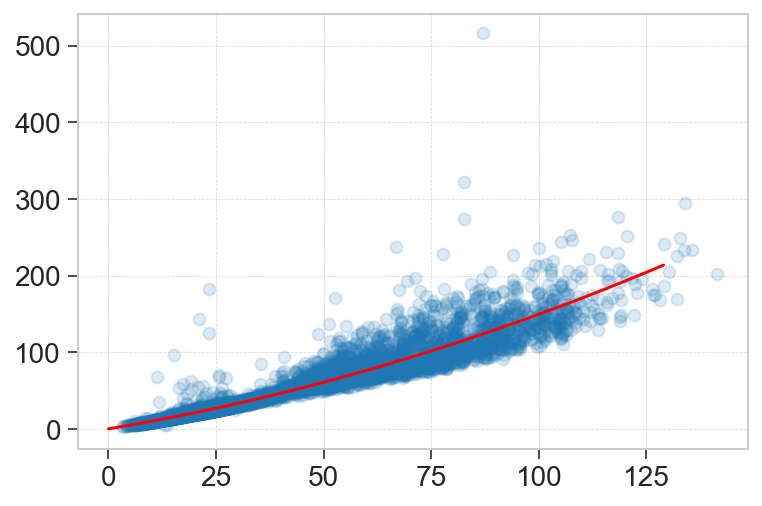

In [20]:
b = parameters[0]
c = parameters[1]

# to plot this, we want to create a set of x-values
x_values = np.arange(0, 130, 1)
fitted_values = fit(x_values, b, c)

plt.scatter(alpha_gfn2, alpha_wb97, alpha=0.15)
plt.plot(x_values, fitted_values, '-', label='fit', color='red')
plt.show()

It sure *looks* better.

We can also calculate the standard error of the parameters.

In [21]:
# we can also calculate the standard error of the parameters
SE = np.sqrt(np.diag(covariance))
SE_b = SE[0]
SE_c = SE[1]

print('slope:', round(b, 5), 'standard error', round(SE_b, 5))
print('quadratic:', round(c, 5), 'standard error', round(SE_c, 5))

slope: 0.93667 standard error 0.00413
quadratic: 0.00558 standard error 6e-05


Finally, in addition to the $R^2$ value, it's often useful to calculate the mean absolute error.

In [22]:
errors = fitted - alpha_wb97 # same as the residuals
absolute_errors = np.abs(errors)

print("MAE: ", np.mean(absolute_errors))

MAE:  4.035905286961638


-------
This notebook is adapted from Prof. Geoffrey Hutchison, University of Pittsburgh
https://github.com/ghutchis/chem1000

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a>